# **Building Deep Convolution Neural Network**
MNIST is a classic dataset of handwritten images has served as the basis for benchmarking classification algorithms.

Our goal here is to train the machine with humongous no. of images of handwritten digits and evaluating how well **Convolution Neural Network** can classify them correctly.


# **Importing Libraries**

In [1]:
import numpy as np                 # advanced math library for linear algebra
import matplotlib.pyplot as plt    # MATLAB like plotting, routines for data processing, CSV file I/O (e.g. pd.read_csv)
import random                      # For generating random number  
%matplotlib inline
#MNIST dataset is included in keras
from keras.datasets import mnist   #Importing the dataset   

#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
from keras.models import Sequential   

from keras.layers.core import Dense, Dropout, Activation #types of layers to be build
from keras.utils import np_utils #numpy realted tools, here used for one hot encoding

In [26]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D,GlobalAveragePooling2D,Flatten 
from keras.layers.normalization.batch_normalization import BatchNormalization

* **ImageDataGenerator**- Keras ImageDataGenerator is used for getting the input of the original data and further, it makes the transformation of this data on a random basis and gives the output resultant containing only the data that is newly transformed.
* **Conv2D**- Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
* **Max pooling**- It downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window for each channel of the input. 
* **ZeroPadding2D**- when moving the feature detector across the input image all the pixels except the edge pixels are taken for calculation repeatedly. So there is unfairness and to address this there is a process called Padding (adding a frame). This layer can add rows and columns of zeros at the top, bottom, left and right side of an image tensor.
* **GlobalAveragePooling2D**- globalAveragePooling2d() function is used for applying global average pooling operation for spatial data.
* **Flatten** - Flatten layer is used to make the multidimensional input one-dimensional, commonly used in the transition from the convolution layer to the full connected layer.
* **BatchNormalization**- It allows each layer of a network to learn by itself a little bit more independently of other layers. Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.


# **Loading and Splitting the Dataset**

MNIST dataset has total 70000 data is splitted in 60000 (28x28 px) dataset is used as training images and 10000(28x28 px) data is used as test images.

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()#loading the dataset and splitting in training and test set
#printing the shape of the training and test set
print("X_train_shape", X_train.shape)
print("X_test_shape", X_test.shape)
print("y_train_shape", y_train.shape)
print("y_test_shape", y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train_shape (60000, 28, 28)
X_test_shape (10000, 28, 28)
y_train_shape (60000,)
y_test_shape (10000,)


# **Data (Image) Processing**

In [5]:

X_train=X_train.reshape(60000,28,28,1) # here we taking imahes in greyscale so we are taking 1 channel.
#X_train=X_train.reshape(60000,28,28,3) if we want to consider RGB then thre should be 3 channel
X_test=X_test.reshape(10000,28,28,1)
#Before applying any normalization, the type of the entire dataframe must be casted from 'str' to 'float' as far as it contains only numerical values.
X_train=X_train.astype('float32')#changing the data to 32 bit float
X_test=X_test.astype('float32')#changing the data to 32 bit float



### **Normalization**
Here we will follow min-max standarization (since pixel cant take negative values so we cant us standard scalar process).
We want to normalize the input data in range 0-1 rather than 0-255.

**Data normalization** is an important step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This makes convergence faster while training the network.

In [ ]:
X_train /= 255   #1byte = 8 bits. (Image is a 2D array) 2^8 =256, so 256 different values can be fit into 1 (0-255)
X_test /= 255   # normalize each value for each pixel 

**Importance of One Hot Encoding**

It is a part of Data Preprocessing. In Deep Learning model to feed the model with data that enables it to make a classification decision, we would require to perform One Hot Encoding during data processing.

In [6]:
nb_classes = 10 # total number of unique digits is 10,i.e., 0-9

Y_train = np_utils.to_categorical(y_train, nb_classes) #it is used to convert array of labeled data(from 0 to nb_classes - 1 ) to one-hot vector. 
Y_test = np_utils.to_categorical(y_test, nb_classes)


 **Model Type: Sequential**

There are three ways to create Keras models:
Sequential Model, Functional API, Model Subclassing 

The **Sequential Model** in Keras allows us to create models layer-by-layer for most problems. It is limited to single-input, single-output stacks of layers.

The Sequential model API is a way of creating deep learning models where an instance of the Sequential class is created and model layers are created and added to it.

In [7]:
model= Sequential()

## **Adding Convolution Layer**
* The convolutional layer is considered an essential block of the CNN.
* A convolutional layer contains a set of filters whose parameters need to be learned. The height and weight of the filters are smaller than those of the input volume.
* Input shape is  28x28x1 as we are taking input 3D data.

 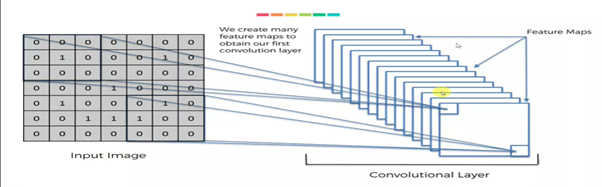



In [8]:
#Convolution Layer 1 is of 32 filters each of which have 3x3 matrices of feature map 
model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
#Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input which helps produce a tensor of outputs.
#Input_shape - As we are taking input 3D data so the shape  is 28x28x1

### **Batch Normalization**
* Batch normalization is a technique for training very deep neural networks that normalizes the contributions to a layer for every mini-batch. 
* This has the impact of settling the learning process and drastically decreasing the number of training epochs required to train deep neural networks. 



In [9]:
model.add(BatchNormalization(axis=-1))

### **RELU Activation Function**
* Activation function decides, whether a neuron should be activated or not by calculating weighted sum and further adding bias with it. 
* The purpose of the activation function is to introduce non-linearity into the output of a neuron.
* **Rectifier function (RELU)** – max(X,0) – take the maximum, anything positive keep that as it is but anything negative make it 0.
* It is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. 
* RELU is such an actiavtion function that preserves the property of  linear function, but is, in fact, a nonlinear function allowing complex relationships in the data to be learned.

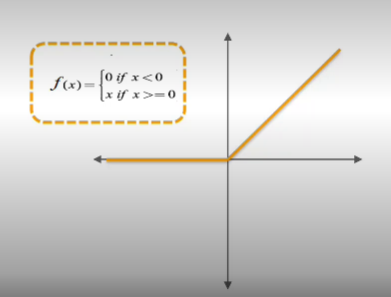

In [10]:
convLayer01 = Activation('relu')

## **Adding Second Convolution Layer**
Convolution Layer 2 is of 32 filters each of which have 3x3 matrices of feature map.

In [11]:
#ConvolutionLayer2
model.add(Conv2D(32,(3,3)))#here the input_shape is not required because this layers can do automatic shape i
model.add(BatchNormalization(axis=-1))

### **Max Pooling**
* We need to pool the most prominent feature from the feature map. This is to be done by Max Pooling.
* It is a pooling operation that selects the maximum element from the region of the feature map covered by the filter(2x2 matrix usually). 
* The output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.

In [13]:
convLayer02=MaxPooling2D(pool_size=(2,2))#Max Pooling to reduce the spatial dimensions of the output volume
#pool size is the 2x2 matrix
#We need to pool the most prominent feature from the feature map. This is to be done by Max Pooling.

In [14]:
model.add(convLayer02)

## **Adding Third Convolution Layer**

In [15]:
#convolutionLayer3
model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization(axis=-1))
convLayer03=Activation('relu')
model.add(convLayer03)

## **Adding Fourth Convolution Layer**

In [16]:
#convolutionLayer4
model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization(axis=-1))
convLayer03=Activation('relu')
convLayer04=MaxPooling2D(pool_size=(2,2))
model.add(convLayer04)
model.add(Flatten()) #flatenning the pooled feature map 

## **Fully Connected Layer**
* Fully connected layers are global (they can introduce any kind of dependence).
* Fully connected layers are an essential component of Convolutional Neural Networks (CNNs), which have been proven very successful in recognizing and classifying images for computer vision. 


In [17]:
#Fully Connected Layer 5
#Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

In [18]:
#Fully Connected layer 6
model.add(Dropout(0.2))#to prevent the net from overfitting a dropout layer ignores a set of neurons randomly
model.add(Dense(10))#Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer
model.add(Activation('softmax'))
#The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution.
#softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels.
#The softmax activation function transforms the raw outputs of the neural network into a vector of probabilities, essentially a probability distribution over the input classes.

# **Summarize Model**
 Keras provides a way to summarize a model. The summary is textual and includes information about:

      * The layers and their order in the model.
      * The output shape of each layer.
      * The number of parameters (weights) in each layer.
      * The total number of parameters (weights) in the model.






In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                        

### **Trainable params** - .
Trainable Parameters in general are weights that are learnt during training. They are weight matrices that contribute to model’s predictive power, changed during back-propagation process. 
### **Non-trainable params** -
Non-trainable parameters is the number of weights that are not updated during training with backpropagation.
There are mainly two types of non-trainable weights:

* The ones that you have chosen to keep constant when training. This means that keras won't update these weights during training at all.
* The ones that work like statistics in BatchNormalization layers. They're updated with mean and variance, but they're not "trained with backpropagation".

Here, weights of all the parameters are  updated during training with backpropagation. 

# **Compiling The Model**


### **The loss function**

* It is a critical part of model training: it quantifies how well a model is performing a task by calculating a single number, the loss, from the model output and the desired target.


* **Categorical crossentropy** is a loss function that is used in multi-class classification tasks. 

* These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one.
* The cross entropy is a measure of how different is the predicted distribution from the target distribution.

### **Optimizer function** -
 * The optimizer helps to determine how quickly the model learns through gradient descent
 * The rate at which descends the gradient is called learning rate.
 * **Adam optimization** is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
 
###**Metric**
 * Calculates how often predictions equal labels.

* This metric creates two local variables, total and count that are used to compute the frequency with which y_pred matches y_true. This frequency is ultimately returned as binary accuracy.


In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

# **Training the Model**
* We train the model by calling fit method.

* During training machine takes in input and weights are decided by computer randomly.

* Then it calculates the difference between the actual output and desired output, that we called the loss function. The optimizer function directs the machine how the weights should be adjusted.

* The fit method refers this cycle of calcualte --> compare --> adjust.

  * **width_shift_range** is a floating point number between 0.0 and 1.0 which specifies the upper bound of the fraction of the total width by which the image is to be randomly shifted, either towards the left or right.
  * ImageDataGenerator class allows you to randomly **rotate images** through any degree between 0 and 360 by providing an integer value in the rotation_range argument.
  * **Shear_range** specifies the angle of the slant in degrees. This creates a sort of 'stretch' in the image, which is not seen in rotation.
  * Input ---> X_train
  * Output --->  Y_train
  * Number of times cycle should run ---> epochs
  * Controlling the amount of o/p to be produced ---> verbose

In [21]:
# data augmentation prevents overfitting by slightly changing the data randomly
#Keras ImageDataGenerator was used to perform data augmentation.
# Keras has a great built-in feature to do automatic augmentation
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08,
                         shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

In [22]:
train_generator= gen.flow(X_train,Y_train,batch_size=128)
test_generator= test_gen.flow(X_test,Y_test,batch_size=128)

In [23]:
model.fit_generator(train_generator,steps_per_epoch=60000//128,epochs=5,verbose=1,
                    validation_data=test_generator,
                    validation_steps=10000//128)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/5
468/468 [==============================] - 207s 439ms/step - loss: 0.1529 - accuracy: 0.9529 - val_loss: 0.0710 - val_accuracy: 0.9803
Epoch 2/5
468/468 [==============================] - 202s 431ms/step - loss: 0.0610 - accuracy: 0.9816 - val_loss: 0.0438 - val_accuracy: 0.9862
Epoch 3/5
468/468 [==============================] - 201s 429ms/step - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0270 - val_accuracy: 0.9903
Epoch 4/5
468/468 [==============================] - 199s 425ms/step - loss: 0.0397 - accuracy: 0.9872 - val_loss: 0.0194 - val_accuracy: 0.9932
Epoch 5/5
468/468 [==============================] - 198s 423ms/step - loss: 0.0375 - accuracy: 0.9881 - val_loss: 0.0294 - val_accuracy: 0.9907


# **Evaluation of the Model**
Evaluation is a process during development of the model to check whether the model is best fit for the given problem and corresponding data. 

In [24]:
score=model.evaluate(X_test,Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 9s 28ms/step - loss: 0.0294 - accuracy: 0.9907
Test score: 0.029366228729486465
Test accuracy: 0.9907000064849854


### **Test Score/Loss Score**
It is the sum of errors made for each example in training or validation sets. Loss value implies how poorly or well a model behaves after each iteration of optimization.

Here we get test score is 0.029
### **Test Accuracy**
The accuracy of a model is usually determined after the model parameters and is calculated in the form of a percentage. It is the measure of how accurate your model's prediction is compared to the true data.

Here we get test accuracy is 0.99